In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install levenshtein

Consider search engines that have indexes of text content. Entering a misspelled search term will match mispellings in the database, but modern search engines often suggest similar queries with larger number of hits in the database. How do they do it? Search engines (like elasticsearch) generate a wide range of possible mispellings of the query and present search results (or spelling suggestions) informed by queries for a comprehensive set of deletion- substitution-, insertion-, and transposition- modified words.

Edit distance (also known as Levenshtein distance) is another approach at fuzzy matching, inspired by the process of changing one input into another. It is more sensitive than Jaccard similarity scoring but requires more computations (that is to say, it takes more time to run, other things held constant).

## Hamming distance

If all of the symbols of interest are the same length, say, five-letter telegraph abbreviations, it is simple to count the number of differences letter-by-letter: ENBET differs in one position from ERBET and differs in two positions from TRBET. 

This counting-of-differences distance metric goes by the name ''Hamming distance'', but this is suited for vocabularies of aligned codewords all the same length.   


## Levenshtein (edit) distance

If you think about the process of editing text, you can modify text by adding text, deleting text, or, if you are inclined, by both deleting and adding in about the same place. These three "operations" can be turned into a loss function that describes how hard it would be to edit string1 into string2. There are algorithms that will find the minimum number of edits that will transform one string into another (similar) string and this minimum number of edits score has many uses in data munging.

The Levenshtein distance counts the differences between two strings by describing the minimum number of steps needed to transform one string into the other, where the permitted steps are
1. substitution (replace a character with a different one)
2. insertion (add a character), and
3. deletion.

This is the number of single-character edits needed to transform one string into another.


Levenshtein distance is fairly easy to illustrate by providing an example alignment: 

The first string can be changed into the second with a three-character deletion (`n't`), a three-caracter substitution (`she` for `you`), and eight characters of insertions  `w` and `e to go`. 

The edit distance between the strings is the sum of the number of changes.  

Search engines which index text can sometimes give reasonable results when given inexexact search queries, but it is not without some engineering.  Entering a misspelled search term will match mispellings in the database and will fail to find exact matches on the correct spelling.  Modern search engines often suggest similar queries with larger number of hits in the database. How do they do it? Search engines (like elasticsearch) generate a wide range of possible mispellings of the query and present search results (or spelling suggestions) informed by queries for a comprehensive set of deletion- substitution-, insertion-, and transposition- modified words.  Yes, you have to check the search index hundreds of times, but if you see a one- or two-letter different search term with hundreds of times the hits, you would do well to suggest it.

In [2]:
import Levenshtein

In [3]:
from Levenshtein import distance

The `Levenshtein.distance` function finds the minimum number of steps.  For two completely different words, all the letters must be replaced:

In [4]:
distance("one", "six")

3

While for a word that is a subset of another, the missing letters must all be added:

In [5]:
distance("seven", "seventeen")

4

## Distances between number words

Here we calculate the Levenshtein distance between the words for the first twenty counting numbers in English:

In [6]:
numbers2 = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
           "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen",
           "eighteen", "nineteen", "twenty"]

In [7]:
d = np.zeros((20,20))
# Calculate distance between all pairs of strings in numbers2
for i in range(len(numbers2)):
    for j in range(len(numbers2)):
        d[i][j] = distance( numbers2[i], numbers2[j])


([<matplotlib.axis.XTick at 0x7f497c7f1d10>,
 [Text(0, 0, 'one'),
  Text(1, 0, 'two'),
  Text(2, 0, 'three'),
  Text(3, 0, 'four'),
  Text(4, 0, 'five'),
  Text(5, 0, 'six'),
  Text(6, 0, 'seven'),
  Text(7, 0, 'eight'),
  Text(8, 0, 'nine'),
  Text(9, 0, 'ten'),
  Text(10, 0, 'eleven'),
  Text(11, 0, 'twelve'),
  Text(12, 0, 'thirteen'),
  Text(13, 0, 'fourteen'),
  Text(14, 0, 'fifteen'),
  Text(15, 0, 'sixteen'),
  Text(16, 0, 'seventeen'),
  Text(17, 0, 'eighteen'),
  Text(18, 0, 'nineteen'),
  Text(19, 0, 'twenty')])

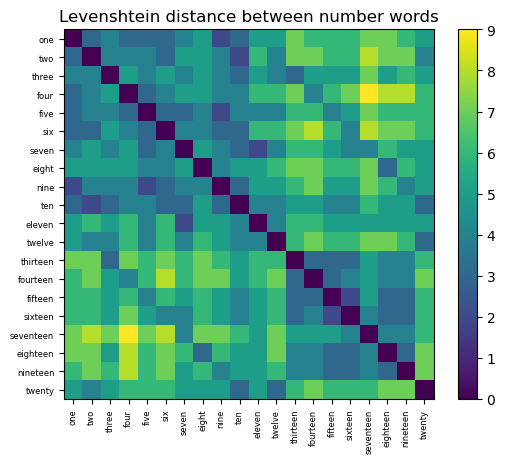

In [8]:
plt.imshow(d)
plt.colorbar()
plt.title("Levenshtein distance between number words")
plt.yticks(np.arange(len(numbers2)), numbers2, fontsize=6)
plt.xticks(np.arange(len(numbers2)), numbers2, fontsize=6, rotation=90)

This looks different from the set-based number-word similarity graph we constructed earlier.  First, we are measuring distance, not similarity, so the diagonal has distance 0 instead of similarity 1.  Second, the range of the distances is integers between 0 and the sum of the lengths of the two strings being compared.  

Since this depends on a property of the strings that is not interesting, we can divide by the maximum possible 

The calculation of edit distance is, in general, more expensive to calculate than Jaccard similarity or Hamming distance; there are three possible operations at each position, and the operations may need to be repeated.


In [9]:
d2 = np.zeros((20,20))
# Calculate distance between all pairs of strings in numbers2
for i in range(len(numbers2)):
    for j in range(len(numbers2)):
        d2[i][j] = distance( numbers2[i], numbers2[j]) / (len(numbers2[i]) + len(numbers2[j])) 

([<matplotlib.axis.XTick at 0x7f497ba40750>,
 [Text(0, 0, 'one'),
  Text(1, 0, 'two'),
  Text(2, 0, 'three'),
  Text(3, 0, 'four'),
  Text(4, 0, 'five'),
  Text(5, 0, 'six'),
  Text(6, 0, 'seven'),
  Text(7, 0, 'eight'),
  Text(8, 0, 'nine'),
  Text(9, 0, 'ten'),
  Text(10, 0, 'eleven'),
  Text(11, 0, 'twelve'),
  Text(12, 0, 'thirteen'),
  Text(13, 0, 'fourteen'),
  Text(14, 0, 'fifteen'),
  Text(15, 0, 'sixteen'),
  Text(16, 0, 'seventeen'),
  Text(17, 0, 'eighteen'),
  Text(18, 0, 'nineteen'),
  Text(19, 0, 'twenty')])

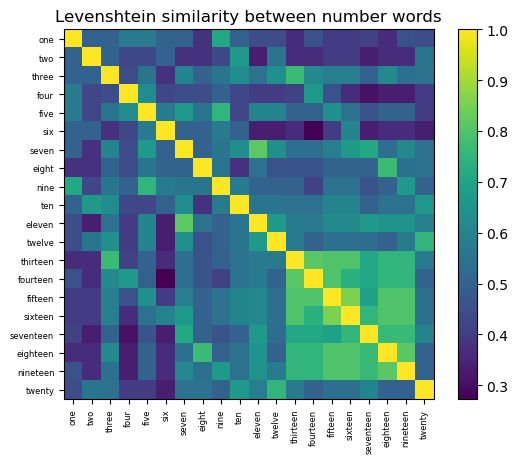

In [10]:
plt.imshow(1-d2)
plt.colorbar()
plt.title("Levenshtein similarity between number words")
plt.yticks(np.arange(len(numbers2)), numbers2, fontsize=6)
plt.xticks(np.arange(len(numbers2)), numbers2, fontsize=6, rotation=90)

## Spelling correction

One straightforward application of fuzzy matching is spelling correction; after checking each token in a document to see if it is in the dictionary, the words which are not in the dictionary are presented to the user along with suggestions of dictionary words that are similar to the unmatched word.

The fuzzy matching can either start from the mispelled word and generate all possible mispellings out to a certain edit distance, or can start from the words in the dictionary, and find those with the fewest needed edits.  Think for a minute which of these might be cheaper (in terms of number of comparisons required.) 

In [11]:
words = pd.read_csv("../../data/SINGLE.txt", header=None)

In [12]:
words

,0
0,&c
1,'d
2,'em
3,'ll
4,'m
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [13]:
# Start with a special-purpose function that only finds the distance
# to one word of interest: 
word = "wprd"   # This is a mispelling
def dist_to_word(w):
        return distance(w, word)

In [14]:
dist_to_word("worm"), dist_to_word("wierd"), dist_to_word("weird")

(2, 2, 2)

In [15]:
# Check that d(word, word) == 0 
dist_to_word("word") == 0 

False

Check that we can find all the distances in one step:

In [16]:
words[0].apply(dist_to_word)

TypeError: object of type 'float' has no len()

Well, that didn't work.  It seems some of the words in the dictionary aren't encoded as strings.  Let us find the rows that are broken:

In [17]:
def test_str(s):
    return type(s) == str
words[0].apply(test_str)

0         True
1         True
2         True
3         True
4         True
          ... 
354979    True
354980    True
354981    True
354982    True
354983    True
Name: 0, Length: 354984, dtype: bool

In [18]:
badindexes = np.where(words[0].apply(test_str)==False)
badindexes

(array([186010, 186271, 198557]),)

Three rows have non-string names in them.

In [19]:
words.loc[badindexes]

,0
186010,NaN
186271,NaN
198557,NaN


The non-string rows are all encoded as `NaN` (Not-a-number, a special symbol that acts like a number).  Examining the dataframe does not tell us about the source of the problem.  Let's try specifying a data type to `read_csv` and hope for the best:

In [20]:
words = pd.read_csv("../../data/SINGLE.txt", header=None, dtype="str")

In [21]:
words.loc[badindexes]

,0
186010,NaN
186271,NaN
198557,NaN


That didn't work either, the bad values are still bad.  The documentation for `read_csv` https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
has a parameter called `na_filter` that can be turned off.

In [22]:
words = pd.read_csv("../../data/SINGLE.txt", header=None, na_filter=False)

And now we test for bad values: 

In [23]:
np.where(words[0].apply(test_str)==False)

(array([], dtype=int64),)

We find none.  What were those bad values, now?

In [24]:
words.loc[badindexes]

,0
186010,n/a
186271,nan
198557,null


Huh.  Might want to take note of that in the future, some strings, by default, get turned into number-like NaNs.

Now let us find the distances between our word and all the other words:

In [25]:
# define this function in a function that we can use on all the rows in 
# the dictionary: 
def distance_to_all(word):
    def dist_to_word(w):
        return distance(w, word)
    distances = words[0].apply(dist_to_word)
    return distances

In [26]:
distance_to_all("wprd")

0         4
1         3
2         4
3         4
4         4
         ..
354979    6
354980    6
354981    6
354982    7
354983    8
Name: 0, Length: 354984, dtype: int64

Let's make a new dataframe with the words and the distances to "wprd":

In [27]:
wprd_dist = words.copy()
wprd_dist["distance"] = distance_to_all("wprd")
wprd_dist

,0,distance
0,&c,4
1,'d,3
2,'em,4
3,'ll,4
4,'m,4
...,...,...
354979,zymurgy,6
354980,zythem,6
354981,zythum,6
354982,zyzzyva,7


Let us examine the histogram of distances.  All the words in the dictionary are in there.

In [28]:
wprd_dist.distance.value_counts()

distance
8     53564
7     50487
9     47505
6     40228
10    38703
11    29049
5     24864
12    21142
13    14115
4     13233
14     8953
15     5167
16     2858
3      2296
17     1419
18      668
19      335
2       147
20      133
21       72
22       20
23       11
24        4
25        3
1         3
27        2
28        1
29        1
26        1
Name: count, dtype: int64

This ordering of the histogram is not ideal for understanding, let us sort by distance:

In [29]:
wprd_dist.distance.value_counts().sort_index()

distance
1         3
2       147
3      2296
4     13233
5     24864
6     40228
7     50487
8     53564
9     47505
10    38703
11    29049
12    21142
13    14115
14     8953
15     5167
16     2858
17     1419
18      668
19      335
20      133
21       72
22       20
23       11
24        4
25        3
26        1
27        2
28        1
29        1
Name: count, dtype: int64

From the table, which gives the values of edit distance as the index and the number of dictionary words at each distance from our target word as values, we see there are three dictionary words at distance 1, and 147 words at edit distance 2. 

In [30]:
wprd_dist.query("distance < 2")

,0,distance
346643,ward,1
350396,wird,1
351455,word,1


In [31]:
wprd_dist.query("distance == 2")

,0,distance
38,3rd,2
15624,aped,2
16021,apod,2
16436,appd,2
16905,apr,2
...,...,...
352228,wur,2
352283,wynd,2
352930,yard,2
353296,yerd,2


This certainly gives us a starting point (or at least a partly ordered list) of plausible words.  

# Diffs

An alignment-based representation of the changes to a document is sometimes an effective way of learning what has changed; algorithms that will compare documents, find the minimum number of edits and show what the edits are with highlighting can be helpful when examining changes to documents or code.